# Лабораторна Робота 1
### З дисципліни "Методи глибинного навчання"
##### Виконала Неділько Дарина, група КМ-91
Тема: «Розробка  програмного  забезпечення  для  реалізації  двошарового 
персептрону з сигмоїдальною функцією активації»

### ***Частина 1***

**Завдання:** розробити  програмне  забезпечення  для  реалізації  класичного
нейрону (мову  програмування  студент  обирає  самостійно). Передбачити 
режим  навчання  класичного  нейрону  на  одному  навчальному  прикладі  та 
режим розпізнавання

#### **Теоретичні відомості**

Вхідними сигналами штучного нейрона $x_i(i = \overline{1,N})$ є вихідні сигнали інших нейронів, кожен з яких узятий зі своєю вагою $w_i (i = \overline{1,N})$. Вхідний оператор $f_{вх}$ перетворює зважені сходи й подає їх на оператор активації $f_{a}$. Вихідний сигнал нейрона $y$ являє собою перетворений вихідним оператором $f_{вих}$ вихідний сигнал оператора активації. Оператор перетворення вектору вхідних сигналів $x$ у вихідний можна записати так: $$y = f_{вих}(f_{а}(f_{вх}(x,w)))$$
**Вхідний оператор(функція)** нейрона задає вигляд перетворення зважених входів. Наприклад сумa зважених входів $f(x,w) = \sum_{i=1}w_ix_i$
**Активаційна функція** $f_a()$ описує правило переходу нейрона зі стану $z(k)$ у момент $k$ у стан $z(k+1)$ при надодженні вхідних сигналів $$x(k+1) = f_a(z(k), f_{вх}(x,w)$$
Найбільш простими активаційними функціями є лінійна, лінійна біполярна з насиченням та лінійна уніполярна з насиченням. Але ці функції мають обмежене застосування і зустрічаються лише у мережах, що не мають у своєму складі прихованих шарів та мають лінійну залежність між вхідними та вихідними заними.
Для розширення можливостей ШНМ використовують нелінійні функції активації. До них належать уніполярна гранична та біполярна порогова функції. Ці функції застосовувалися в основному в класичних ШНМ. Оскільки при побудові нових структур доводиться працювати і з активаційною функцією, і з її похідною, то ці функція має бути монотонною, обмеженою та диференційованою. Тому у якості активаційних функцій обирають логістичні та сигмоїдальні(S-подібні) функції.
До сигмоїдальних функцій належать: логістична(уніполярна) та гіперболічно тангенстна. *У першій частині лабораторної роботи активаційною функцією якраз виступає логістична функція.* $$f_{log} = \frac{1}{1+\exp^{-\alpha z}}$$ Її перша похідна має вигляд $$\frac{\mathrm d}{\mathrm d z} \left( f_{log}(z) \right) = \alpha f_{log}(z)(1-f_{log}(z))$$


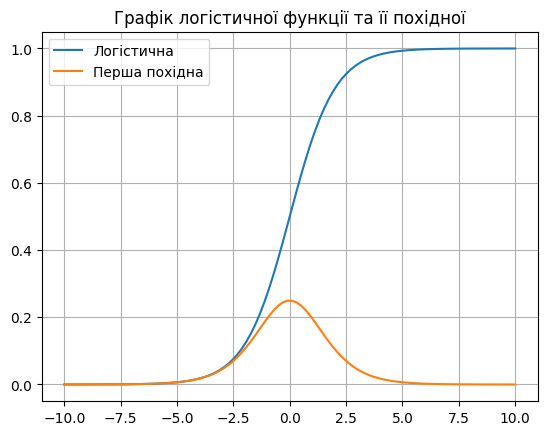

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Логістична активаційна функція
def log(x):
  return 1/(1+np.exp(-x))

# Похідна логістичної функції
def der_log(x):
  return log(x) * (1- log(x))

# генеруємо дані, щоб побудувати саму функцію
x_data = np.linspace(-10,10,100)
y_data = log(x_data)
dy_data = der_log(x_data)

# малюємо
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('Графік логістичної функції та її похідної')
plt.legend(['Логістична','Перша похідна'])
plt.grid()
plt.show()


**Вихідний оператор** служить для педставлення стану нейрона у бажаній області значень.

Найпростіша модель штучного нейрона підсумує $N$ ваг входів і здіснює нелінійне перетворення $$y_i = f_a(\sum_{i=1}^{N}w_{ji}x_i + \theta_{j}), $$де $\theta_{j}$ - пороговий сигнал або ж зсув, $y_i$ - вихідний сигнал j-того нейрона, $f_a$ - активаційна функція, $x_i$ - вхідні сигнали, $w_{ji}$ - синаптичні ваги. $\theta_{j} = w_j0x0$, тому попередню формулу можна переписати як $$y_i = f_a(\sum_{i=1}^{N}w_{ji}x_i) = f(w_j^Tx),$$ де $ x = (1,x_1,....,x_N)^T; w_j = w_{j0}, w_{j1},...,w_{jN})^T$ - вектори входів і ваг розмірності.

#### Тепер реалізуємо та натренуємо класичний нейрон

In [60]:
import random
import math

# зміні для початкового прикладу
x0 = 1
x1 = 3
x2 = 5
x3 = 7

# label для початкового прикладу
yr = 0.3
# похибка
dd = 0.1
# ініціалізуємо вагові коефіціенти
w0 = random.uniform(-1, 1)
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)
w3 = random.uniform(-1, 1)

# лямда функції для кожного обчислення
# активаційна функція
y_cur_f = lambda x: 1/(1+math.exp(-x))
# формула абсолютної похибки
dn_f =lambda y : abs((yr-y)/yr)
# обчслення значення похідної
q_f = lambda y : y*(1-y)*(yr-y)

i=0

# нескінченний цикл, умовою виходу з якого - щоб похибка була допустима
while True:

    # множимо відні дані на вагові коефіціенти
    xs = x0*w0+x1*w1+x2*w2+x3*w3
    # дізнаємося значення функції
    y_cur =  y_cur_f(xs)
    # визначаємо похибку
    dn = dn_f(y_cur)
    if dn <= dd:
        # якщо похибка менше 10% - нейрон навчений, фінальні вагові коефіціенти відомі
        print(f'Фінальні ваги ({w0}, {w1}, {w2}, {w3})\n'
              f'Кількість ітерацій {i}')
        break

    print(f'{i}: y = {y_cur}, dn = {dn}')


    q = q_f(y_cur)
# градієнтний спуск для кожного важка - приріст функції
    dw0 = x0*q
    w0 += dw0
    dw1 = x1 * q
    w1 += dw1
    dw2 = x2 * q
    w2 += dw2
    dw3 = x3 * q
    w3 += dw3

    #i-та ітерація
    i+=1

x0_r = 1.4
x1_r = 2.89
x2_r = 5.08
x3_r = 6.6

# тепер передбачаємо Y на інших даних
xs_r = x0_r*w0+x1_r*w1+x2_r*w2+x3_r*w3
yr_c = y_cur_f(xs_r)

print(f'Результат передбачення за x = ({x0_r},{x1_r},{x2_r},{x3_r}) - Ych = {yr_c}')

0: y = 0.013617536779406421, dn = 0.954608210735312
1: y = 0.018714561886309346, dn = 0.9376181270456356
2: y = 0.02859116811946813, dn = 0.9046961062684397
3: y = 0.052527804656691705, dn = 0.8249073178110277
4: y = 0.13495019726674173, dn = 0.5501660091108609
5: y = 0.4404353650522665, dn = 0.468117883507555
6: y = 0.04122212050463884, dn = 0.8625929316512038
7: y = 0.09215827664582918, dn = 0.6928057445139028
Фінальні ваги (-0.5887869628455602, -0.2053998392676346, 0.9545507877088031, -0.6278064614219894)
Кількість ітерацій 8
Результат передбачення за x = (1.4,2.89,5.08,6.6) - Ych = 0.3290881901734149


**Висновки:** У ході цієї частини лабораторної роботи вдалося натренувати класичний нейрон. Було застосовано теорію та досліджено на практиці роботу алгоритму тренування нейрону.

### ***Частина 2***

**Завдання:** розробити програмне забезпечення для реалізації елементарного двошарового персептрону із структурою 1-1-1. Передбачити режим навчання на одному навчальному прикладі та режим розпізнавання.

#### **Теоретичні відомості**
У другій частині лабораторної роботи буде реалізована робота двошарового персептрону, тому простоную розібратися що це таке і з чим його їдять.
У персептронах зазвичай використовують модель модульованої сигноїди, $$f(x,y) = \frac{1}{1+e^{-x-y-\theta }} - \frac{1}{1+e^{x-y-\theta}}$$ де активаційною функцією виступає функція Гевісайда.$$ f(z) =\begin{cases} 1 & \quad \text{при } z \geq \alpha\\ 0  & \quad \text{при } z< \alpha \end{cases}$$За досягнення зваженою сумою значення, більшого порога $\theta$, на виході сигналу з'являється одиничний сигнал, якщо ж зважена сума менше $\theta$, то сигнал відсутній.

Елементарний персептрон складається з таких шарів: сітківки, асоціативного шару та вихідного. Ці шари займаються відповідно обробкою образу, оцінкою його характеристик та розпізнаванням. Попередня обробка образу не залежить від його виду, але у результаті ми матимемо можливість розпізнавання образів на основі аналізу їхньої характеристики. Вихідний шар(класифікатор) аналізує характеристики знову пропонованого образу та встановлює його відповідність одному з раніше поданих.
Нейрони асоціативного шару містять лінійні активаційні функції, тому під час надходження їх сітківки вхідних сигналів вони посилають імпульси на вихідний шар, де й відбуваєтья додавання зважених імпульсів.
Особливістю персептрона є здатність до навчання його вагових коефіціентів. У режимі навчання йому подаються пари, що навчають $(x,y*)$. На основі цих пар відбувається налаштування параметрів так, щоб при вході деякого сигналу x на виході був отриманий відповідний цим сигналам у. Навчання завершується лише тоді, коли усі пари $(x,y*)$ асоціюються правильно.

Основне правило навчання персептрона: вагові коефіціенти персептрона змінюються тільки тоді, коли виникає розбіжність між його фактичною й бажаною реакціями.
Алгоритм навчання може бути записаний у такий спосіб: $$w_{p+1} = w_p+\gamma e_px_p,$$ де $e_p = y_p^*$ - помилка класифікації, $\gamma$ - параметр, що впливає на швидкість збіжності алгоритму.

Для виконання завдання ми будемо використовувати звичайну сигноїдальну\логістичну функцію, як і до цього, тобто $$f_{log} = \frac{1}{1+\exp^{-\alpha z}}$$ Її перша похідна має вигляд $$\frac{\mathrm d}{\mathrm d z} \left( f_{log}(z) \right) = \alpha f_{log}(z)(1-f_{log}(z))$$

#### Перейдемо до завдання
Нехай навчальний приклад Х = 1.5, Yr = 0.2. Похибка обчислень 0.1.

- $X = x_1 = y_1 = x_2$

- $x_{2,s} = w_{1,2}*x_2$

- $y_2 = \frac{1}{1 + e^{-x_{2,s}}}$

- $y_2 = x_3$

- $x_{3,s} = w_{2,3}*x_3$

- $y_3 = \frac{1}{(1+e^{-x_{3,s}}}$

- $y_3 = Y$

In [66]:
i = 0
# навчальний приклад
X = 1.5
Yr = 0.2

# приклад для режиму розпізнавання
X_r = 1.45

#генеруємо вагові коефіціенти w1.2 та w2.3
w12 = random.uniform(-1, 1)
w23 = random.uniform(-1, 1)

# активаційна функція сигноїд
sign = lambda x: 1/(1+math.exp(-x))

# приріст функції
q3 = lambda y: y*(1-y)*(Yr-y)
q2 = lambda y, q, w: y*(1-y)*(q*w)

# дельта
dw = lambda q,y: q*y

# нова вага
wn = lambda wp, q, y: wp + dw(q,y)

# формула абсолютної похибки
dn_f =lambda y : abs((yr-y)/yr)

while True:

    # знаходимо x2 та застосовуємо до нього активаційну функцію, отримуючи y2
    x2s = w12*X
    y2 = sign(x2s)

    # знаходимо на основі у2 новий х3 та розраховуємо на основі нього У результуюче
    x3s = w23*y2
    y3 = sign(x3s)

    # обраховуємо похибку, щоб визначити, чи можемо ми вважати модель натренованою
    dn = dn_f(y3)

    # умова входу з тренування, якщо абсолютна похибка результату менше 10%
    if dn <= dd:
        print(f'Фінальні ваги ({w12}, {w23}\n'
              f'Кількість ітерацій {i}')
        break

    print(f'{i}: Y = {y3}, dn = {dn}')

    # здійснюємо коригування вагів - вираховуємо приріст функції - градієнтний спуск
    q3_ = q3(y3)
    q2_ = q2(y2, q3_, w23)

    w23 = wn(w23, q3_, y2)
    w12 = wn(w12, q2_, X)

    #i-та ітерація
    i+=1

# проводимо предбачення на основі натренованої моделі

x2s = w12*X_r
y2 = sign(x2s)

# знаходимо на основі у2 новий х3 та розраховуємо на основі нього У результуюче
x3s = w23*y2
y3 = sign(x3s)

print(f'Результат передбачення за X = ({X_r}) - Ych = {y3}')



0: Y = 0.4517242274673639, dn = 0.505747424891213
1: Y = 0.44784042065905244, dn = 0.49280140219684154
2: Y = 0.44392222001156734, dn = 0.47974073337189116
3: Y = 0.4399685388144622, dn = 0.46656179604820736
4: Y = 0.4359790064970748, dn = 0.4532633549902493
5: Y = 0.43195396180057694, dn = 0.4398465393352565
6: Y = 0.42789444082454325, dn = 0.42631480274847755
7: Y = 0.4238021588803613, dn = 0.4126738629345378
8: Y = 0.4196794852976267, dn = 0.3989316176587558
9: Y = 0.41552941059104587, dn = 0.3850980353034863
10: Y = 0.4113555056969801, dn = 0.3711850189899337
11: Y = 0.40716187331912945, dn = 0.35720624439709825
12: Y = 0.40295309176681193, dn = 0.34317697255603985
13: Y = 0.39873415200896173, dn = 0.3291138400298725
14: Y = 0.3945103889831612, dn = 0.31503462994387077
15: Y = 0.3902874084728313, dn = 0.30095802824277096
16: Y = 0.38607101108032443, dn = 0.28690337026774815
17: Y = 0.3818671149658999, dn = 0.27289038321966647
18: Y = 0.37768167908423605, dn = 0.2589389302807869
19:

**Висновки:** в ході цієї частини вдалося натренувати елементарний двошаровий персептрон. Було розглянуто теорію будови та роботи персептрону, досліджено математичне підґрунтя структури нейронів.

### ***Частина 3***

**Завдання:** розробити  програмне  забезпечення  для  реалізації  двошарового персептрону із структурою 2-3-1. Передбачити режим навчання «ON-LINE» та режим розпізнавання.

#### **Теоретичні відомості**
Корекція ваг може відбуватися в offline та online режимах. У режимі online корекція відбувається при поданні кожної навчальної пари $(x_p,y_p^*), p=\overline{1,P}$. У режимі offline на М-тому цифклі(епосі) навчання подаються всі пари $(x_p,y_p^*)$ і обчислюєтья середнє значення помилки класифікації $$\overline{e} = \frac{1}{P}\sum_{p=1}^{P}(y_{P,M}^{*}-y_{P,M}),$$ де $y_{P,M}^{*},y_{P,M}$ - бажані та реальні вихідні дані.
У навчанні персептрону використовується механізм зворотнього поширення помилок. Цей алгоритм реалізує градієнтний метод мінімізації опуклого функціонала помилкив багатошарових мережах прямого поширення, що використовують моделі нейронів з диференціальними функціями активації.
Для реалізації алгоритму зворотнього поширення необхідно:
- Подати на вхід мережі сигнал $x_i$ з деякої пари $(x_i,y_i^*)$
- Обчислити реакцію моделі $y_i$
- порівняти отриману реакцію $y_i$ з необхідною $y_i^*$ і визначити помилку $y_i^*-y_i$
- Скорегувати ваги так, щоб помилка була мінімальною.
- Кроки повторювати для усієї множини навчальних пар, доки помилка не зменшиться до допустимого рівню

Таким чином, у процесі навчання мережі подача вхідного сигналу й обчислення реакції це *прямий* прохід, а обчислення помилки та корекція вихідних параметрів - *зворотній*.

#### Перейдемо до завдання
Піддослідна функція $x_1+x_2=y$
$X = (x_0,x_1,x_2) = (1, 0.3, 0.4)  ->  Y^* = 0.7 $

In [71]:
import numpy

i=0

# генеруємо ваги (W1.*(1), W2.*(1), W1.*(2) та W0.*(1), W0.(2))
W = np.random.uniform(size=(3,3))
Wo = np.random.uniform(size=4)

# навчальний приклад
X = np.array([1,0.3,0.4])
Yr = 0.7

# допустима похибка
dd = 0.1


# активаційна функція сигноїд
sign = lambda x: 1/(1+math.exp(-x))

# формула абсолютної похибки
dn_f =lambda y : abs((Yr-y)/Yr)

# приріст функції - обрахування помилки
q3 = lambda y: y*(1-y)*(Yr-y)
q2 = lambda y, q, w: y*(1-y)*(q*w)

# дельта
dw = lambda q,y: q*y

# нова вага
wn = lambda wp, q, y: wp + dw(q,y)

# код моделі
def model(W,Wo,X):
    # перший шар
    x1s1 = Wo[0]*X[0] + W[0][0]*X[1] + W[1][0]*X[2]
    y12 = sign(x1s1)
    x2s1 = Wo[1]*X[0] + W[0][1]*X[1] + W[1][1]*X[2]
    y22 = sign(x2s1)
    x3s1 = Wo[2]*X[0] + W[0][2]*X[1] + W[1][2]*X[2]
    y32 = sign(x3s1)

    # другий шар
    x1s2 = Wo[3]*X[0] + W[2][0]*y12 + W[2][1]*y22 + W[2][2]*y32
    Y = sign(x1s2)
    return (Y, y12,y22,y32)



dn = 10
while dn > dd:
    Y,y12, y22, y32 = model(W, Wo, X)
    dn = dn_f(Y)

    #коригуємо ваги у зворотньому порядку для вихідного шару
    #розрахунок помилок
    q13 = q3(Y)
    q12 = q2(y12, q13, W[2][0])
    q22 = q2(y12, q13, W[2][1])
    q32 = q2(y12, q13, W[2][2])
    #коригування ваг
    Wo[3] = wn(Wo[3],q13,Y)
    W[2][0] = wn(W[2][0],q13,y12)
    W[2][1] = wn(W[2][1],q13,y22)
    W[2][2] = wn(W[2][2],q13,y32)

    #переходимо до прихованого шару
    #корегування ваг 1го нейрону
    Wo[0] = wn(Wo[0],q12,X[0])
    W[0][0] = wn(W[0][0],q12,X[1])
    W[1][0] = wn(W[1][0],q12,X[2])

    #корегування ваг 2го нейрону
    Wo[1] = wn(Wo[1],q22,X[0])
    W[0][1] = wn(W[0][1],q22,X[1])
    W[1][1] = wn(W[1][1],q22,X[2])

    #корегування ваг 3го нейрону
    Wo[2] = wn(Wo[2],q32,X[0])
    W[0][2] = wn(W[0][2],q32,X[1])
    W[1][2] = wn(W[1][2],q32,X[2])
    print(f'{i}: Y = {Y}, dn = {dn}')
    i+=1



print(f'Ваги:\n'
    f'w0.1(1) = {Wo[0]}; w0.2(1) = {Wo[1]}; w0.3(1) = {Wo[2]};\n'
    f'w1.1(1) = {W[0][0]}; w1.2(1) = {W[0][1]}; w1.3(1) = {W[0][2]};\n'
    f'w2.1(1) = {W[1][0]}; w2.2(1) = {W[1][1]}; w2.3(1) = {W[1][2]};\n'
    f'w0.1(2) = {Wo[3]}; \n'
    f'w1.1(2) = {W[2][0]}; w2.1(2) = {W[2][1]}; w3.1(2) = {W[2][2]};\n'
    f'Кількість ітерацій {i}; Вихідний сигнал {Y}')


Xt = np.array([1,0.32,0.39])
Ytrpr,_,_,_ = model(W,Wo,Xt)
print(f'Режим розпізнавання для X = (x0,x1,x2) = {Xt} ->> Y = {Ytrpr}')

0: Y = 0.84783421241763, dn = 0.21119173202518582
1: Y = 0.8421063011858297, dn = 0.20300900169404257
2: Y = 0.836286314722289, dn = 0.19469473531755577
3: Y = 0.830397282599163, dn = 0.18628183228451867
4: Y = 0.8244642172196749, dn = 0.17780602459953562
5: Y = 0.818513660048885, dn = 0.1693052286412644
6: Y = 0.8125731452863878, dn = 0.16081877898055408
7: Y = 0.8066706045122479, dn = 0.15238657787463997
8: Y = 0.8008337413818619, dn = 0.14404820197408852
9: Y = 0.795089408491304, dn = 0.13584201213043443
10: Y = 0.7894630186304403, dn = 0.12780431232920053
11: Y = 0.7839780197575007, dn = 0.1199685996535725
12: Y = 0.7786554575665872, dn = 0.11236493938083887
13: Y = 0.7735136422278746, dn = 0.10501948889696372
14: Y = 0.7685679277090933, dn = 0.09795418244156195
Ваги:
w0.1(1) = 0.21696829050338415; w0.2(1) = 0.48287519158908193; w0.3(1) = 0.9750443780865614;
w1.1(1) = 0.5484298487503706; w1.2(1) = 0.26723956298219115; w1.3(1) = 0.12097014265205076;
w2.1(1) = 0.3381969521145147; w2.

**Висновки:** У ході третьої частини було розглянуто будову двошарового персептрона 2-3-1, детальніше розглянуто алгоритм зворотнього поширення та натреновано подану модель. Це допомогло ґрунтовно розібратися з тим, як працюють нейронні мережі та яка математика за ними стоїть. Досліджено вплив вхідного сигналу та значень початкових вагів на кількість ітерацій та точність передбачень моделі.